In [9]:
import numpy as np
import requests
import pandas as pd
import sys
import matplotlib.pyplot as plt
import datetime


%matplotlib inline

In [10]:
#Useful functions

#df_col_astype_int: Intakes the dataframe and corrects the types of the values in each column 
def df_col_astype_int(df,col_names,col_names_float):
    '''Inputs:
            df: A pandas Dataframe.
            col_names: Names of the columns in df.
            col_names_float: Names of the columns that instead of having to be integers need to be floats.
            
        Outputs:
            df but with the correct columns changed to integers and floats'''
    
    for name in col_names:
        if name not in col_names_float:
            df[name] = df[name].astype(int)
        elif name in col_names_float:
            df[name] = df[name].astype(float)
        else:
            print("Error: Unaccounted for name in col_names list. Revise these lists")
            sys.exit()
    return df

#chunks splits column_name list into chunks of size n
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
#delete_nan_rows retrns df with rows containing non-Nan values        
def delete_nan_rows(df):
    """Returns df with rows containing non-NaN values"""
    for name in df.columns:
        df = df[np.isfinite(df[name])]
    return df

#isgreaterthan returns df with column values >= a specified value (e.g 0) unless stated otherwise
def isgreaterthan(df,value,col_names_ltv):
    """Returns df with rows contained features greater or equal to
        value (except from those excluded in col_names_ltv)"""
    for name in df.columns:
        if name not in col_names_ltv:
            df = df[df[name]>=value]
    return df

In [11]:
#Load all the player history data from Fantasy Premier League (FPL)

fpl_data = requests.get('https://fantasy.premierleague.com/drf/bootstrap-static').json()

for i, player in enumerate(fpl_data['elements']):
    fpl_data['elements'][i]['history'] = requests.get('https://fantasy.premierleague.com/drf/element-summary/' + str(player['id'])).json()

In [15]:
#Points threshold
threshold_points = 6

#Position Booleans
goalkeeper = False
defender = False
midfielder = False
forward = True


if goalkeeper == True:
    position = 1
    position_str = 'goalkeeper'
elif defender == True:
    position = 2
    position_str = 'defender'
elif midfielder == True:
    position = 3
    position_str = 'midfielder'
elif forward == True:
    position = 4
    position_str = 'forward'
else:
    print("Error: Invalid position value ")
    sys.exit()
    
#Feature names are specific to whather an individual player is outfield or in goal
#Featue details should be obvious by name but more info can be found at https://fantasy.premierleague.com/help/
#Feature selection under decision after considering correlations between them in the future.
if goalkeeper == False:
    column_names = ['element','GW','minutes','goals_scored','assists','clean_sheets','goals_conceded','own_goals',
                    'penalties_missed','yellow_cards','red_cards','bonus','bps','influence','creativity','threat',
                    'ict_index','open_play_crosses','big_chances_created','clearances_blocks_interception','recoveries',
                    'key_passes','tackles','attempted_passes','completed_passes','big_chances_missed',
                    'errors_leading_to_goal','errors_leading_to_goal_attempt','tackled','offside','target_missed',
                    'fouls','dribbles','total_points']
    df = pd.DataFrame(columns=column_names)
elif goalkeeper == True:
    column_names = ['element','GW','minutes','clean_sheets','goals_conceded','own_goals','penalties_missed',
                    'yellow_cards','red_cards','bonus','bps','influence','creativity','threat','ict_index',
                    'big_chances_created','clearances_blocks_interception','recoveries','key_passes','tackles',
                    'attempted_passes','completed_passes','big_chances_missed','errors_leading_to_goal','errors_leading_to_goal_attempt',
                    'tackled','penalties_saved','saves','penalties_conceded','total_points']
    df = pd.DataFrame(columns=column_names)

print('Position tuning complete')

Position tuning complete


In [16]:
#Creating the complete player history dataframe for players of a particular position

for i, player in enumerate(fpl_data['elements']):
    if fpl_data['elements'][i]['element_type'] == position: 
        print('ID: ',fpl_data['elements'][i]['id'], " Name: ",fpl_data['elements'][i]['web_name'])
        for m in range(0,len(fpl_data['elements'][i]['history']['history'])):
            if goalkeeper == False:
                                
                element = int(fpl_data['elements'][i]['history']['history'][m]['element'])
                GW = int(fpl_data['elements'][i]['history']['history'][m]['round'])
                minutes = int(fpl_data['elements'][i]['history']['history'][m]['minutes'])
                goals_scored = int(fpl_data['elements'][i]['history']['history'][m]['goals_scored'])
                assists = int(fpl_data['elements'][i]['history']['history'][m]['assists'])
                clean_sheets = int(fpl_data['elements'][i]['history']['history'][m]['clean_sheets'])
                goals_conceded = int(fpl_data['elements'][i]['history']['history'][m]['goals_conceded'])
                own_goals = int(fpl_data['elements'][i]['history']['history'][m]['own_goals'])
                penalties_missed = int(fpl_data['elements'][i]['history']['history'][m]['penalties_missed'])
                yellow_cards = int(fpl_data['elements'][i]['history']['history'][m]['yellow_cards'])
                red_cards = int(fpl_data['elements'][i]['history']['history'][m]['red_cards'])
                bonus = int(fpl_data['elements'][i]['history']['history'][m]['bonus'])
                bps = int(fpl_data['elements'][i]['history']['history'][m]['bps'])
                influence = float(fpl_data['elements'][i]['history']['history'][m]['influence'])
                creativity = float(fpl_data['elements'][i]['history']['history'][m]['creativity'])
                threat = float(fpl_data['elements'][i]['history']['history'][m]['threat'])
                ict_index = float(fpl_data['elements'][i]['history']['history'][m]['ict_index'])
                open_play_crosses = int(fpl_data['elements'][i]['history']['history'][m]['open_play_crosses'])
                big_chances_created = int(fpl_data['elements'][i]['history']['history'][m]['big_chances_created'])
                clearances_blocks_interception = int(fpl_data['elements'][i]['history']['history'][m]['clearances_blocks_interceptions'])
                recoveries = int(fpl_data['elements'][i]['history']['history'][m]['recoveries'])
                key_passes = int(fpl_data['elements'][i]['history']['history'][m]['key_passes'])
                tackles = int(fpl_data['elements'][i]['history']['history'][m]['tackles'])
                attempted_passes = int(fpl_data['elements'][i]['history']['history'][m]['attempted_passes'])
                completed_passes = int(fpl_data['elements'][i]['history']['history'][m]['completed_passes'])
                big_chances_missed = int(fpl_data['elements'][i]['history']['history'][m]['big_chances_missed'])
                errors_leading_to_goal = int(fpl_data['elements'][i]['history']['history'][m]['errors_leading_to_goal'])
                errors_leading_to_goal_attempt = int(fpl_data['elements'][i]['history']['history'][m]['errors_leading_to_goal_attempt'])
                tackled = int(fpl_data['elements'][i]['history']['history'][m]['tackled'])
                offside = int(fpl_data['elements'][i]['history']['history'][m]['offside'])
                target_missed = int(fpl_data['elements'][i]['history']['history'][m]['target_missed'])
                fouls = int(fpl_data['elements'][i]['history']['history'][m]['fouls'])
                dribbles = int(fpl_data['elements'][i]['history']['history'][m]['dribbles'])

                total_points = int(fpl_data['elements'][i]['history']['history'][m]['total_points'])
                
                series = pd.Series([element,GW,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,
                    penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,
                    ict_index,open_play_crosses,big_chances_created,clearances_blocks_interception,recoveries,
                    key_passes,tackles,attempted_passes,completed_passes,big_chances_missed,
                    errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,
                    fouls,dribbles,total_points],index=column_names)

            elif goalkeeper == True:

                element = int(fpl_data['elements'][i]['history']['history'][m]['element'])
                GW = int(fpl_data['elements'][i]['history']['history'][m]['round'])
                minutes = int(fpl_data['elements'][i]['history']['history'][m]['minutes'])
                clean_sheets = int(fpl_data['elements'][i]['history']['history'][m]['clean_sheets'])
                goals_conceded = int(fpl_data['elements'][i]['history']['history'][m]['goals_conceded'])
                own_goals = int(fpl_data['elements'][i]['history']['history'][m]['own_goals'])
                penalties_missed = int(fpl_data['elements'][i]['history']['history'][m]['penalties_missed'])
                yellow_cards = int(fpl_data['elements'][i]['history']['history'][m]['yellow_cards'])
                red_cards = int(fpl_data['elements'][i]['history']['history'][m]['red_cards'])
                bonus = int(fpl_data['elements'][i]['history']['history'][m]['bonus'])
                bps = int(fpl_data['elements'][i]['history']['history'][m]['bps'])
                influence = float(fpl_data['elements'][i]['history']['history'][m]['influence'])
                creativity = float(fpl_data['elements'][i]['history']['history'][m]['creativity'])
                threat = float(fpl_data['elements'][i]['history']['history'][m]['threat'])
                ict_index = float(fpl_data['elements'][i]['history']['history'][m]['ict_index'])
                big_chances_created = int(fpl_data['elements'][i]['history']['history'][m]['big_chances_created'])
                clearances_blocks_interceptions = int(fpl_data['elements'][i]['history']['history'][m]['clearances_blocks_interceptions'])
                recoveries = int(fpl_data['elements'][i]['history']['history'][m]['recoveries'])
                key_passes = int(fpl_data['elements'][i]['history']['history'][m]['key_passes'])
                tackles = int(fpl_data['elements'][i]['history']['history'][m]['tackles'])
                attempted_passes = int(fpl_data['elements'][i]['history']['history'][m]['attempted_passes'])
                completed_passes = int(fpl_data['elements'][i]['history']['history'][m]['completed_passes'])
                big_chances_missed = int(fpl_data['elements'][i]['history']['history'][m]['big_chances_missed'])
                errors_leading_to_goal = int(fpl_data['elements'][i]['history']['history'][m]['errors_leading_to_goal'])
                errors_leading_to_goal_attempt = int(fpl_data['elements'][i]['history']['history'][m]['errors_leading_to_goal_attempt'])
                tackled = int(fpl_data['elements'][i]['history']['history'][m]['tackled'])
                penalties_saved = int(fpl_data['elements'][i]['history']['history'][m]['penalties_saved'])
                saves = int(fpl_data['elements'][i]['history']['history'][m]['saves'])
                penalties_conceded = int(fpl_data['elements'][i]['history']['history'][m]['penalties_conceded'])

                total_points = int(fpl_data['elements'][i]['history']['history'][m]['total_points'])
                
                series = pd.Series([element,GW,minutes,clean_sheets,goals_conceded,own_goals,penalties_missed,
                    yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,
                    big_chances_created,clearances_blocks_interception,recoveries,key_passes,tackles,
                    attempted_passes,completed_passes,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,
                    tackled,penalties_saved,saves,penalties_conceded,total_points],index=column_names)
            #threshold = threshold_points
            #if total_points >= threshold_points:
            #    passed = 1
            #else:
            #    passed = 0

            df = df.append(series,ignore_index=True)

print(" ")
print("Players full history DataFrame successfully filled!")

ID:  21  Name:  Welbeck
ID:  22  Name:  Lacazette
ID:  23  Name:  Aubameyang
ID:  552  Name:  Nketiah
ID:  43  Name:  Wilson
ID:  44  Name:  Mousset
ID:  45  Name:  King
ID:  46  Name:  Defoe
ID:  62  Name:  Murray
ID:  63  Name:  Hemed
ID:  64  Name:  Baldock
ID:  65  Name:  Locadia
ID:  66  Name:  Andone
ID:  551  Name:  Gyokeres
ID:  84  Name:  Vokes
ID:  85  Name:  Barnes
ID:  86  Name:  Wells
ID:  87  Name:  Wood
ID:  495  Name:  Vydra
ID:  107  Name:  Zohore
ID:  108  Name:  Bogle
ID:  109  Name:  Madine
ID:  110  Name:  Reid
ID:  133  Name:  Giroud
ID:  134  Name:  Morata
ID:  496  Name:  Abraham
ID:  151  Name:  Zaha
ID:  152  Name:  Benteke
ID:  153  Name:  Sørloth
ID:  444  Name:  Wickham
ID:  505  Name:  Ayew
ID:  175  Name:  Calvert-Lewin
ID:  176  Name:  Niasse
ID:  177  Name:  Tosun
ID:  470  Name:  Sandro
ID:  189  Name:  Kamara
ID:  480  Name:  Mitrovic
ID:  513  Name:  Vietto
ID:  209  Name:  Quaner
ID:  210  Name:  Depoitre
ID:  211  Name:  Mounie
ID:  212  Name:  Kac

In [17]:
#Cleaning the Dataframe
col_names_float = ['influence','creativity','threat','ict_index']   #Names of features that require to be of type float
df = df_col_astype_int(df,column_names,col_names_float)  #Changes features in df to correct type (int and floats only) 
df.head()

#Applying threshold to the Dataframe
df.loc[df['total_points']>=threshold_points,'threshold'] = 1   #Creates new column 'threshold' and = 1 if 'total_points' > threshold_points
df.fillna(0,inplace=True)  #Those not = 1 now = 0
df['threshold'] = df['threshold'].astype(int)   #Remembers to change type of series to integer.

print("Threshold set at 'total_points >= '", threshold_points)
print('Threshold column successfully applied to Dataframe.')

pd.options.display.max_columns = None  #Line required to show all columns in df output below
display(df.head())

Threshold set at 'total_points >= ' 6
Threshold column successfully applied to Dataframe.


,element,GW,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,open_play_crosses,big_chances_created,clearances_blocks_interception,recoveries,key_passes,tackles,attempted_passes,completed_passes,big_chances_missed,errors_leading_to_goal,errors_leading_to_goal_attempt,tackled,offside,target_missed,fouls,dribbles,total_points,threshold
0,21,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21,2,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,21,3,15,1,0,0,0,0,0,0,0,3,30,40.2,0.3,34.0,7.5,0,0,0,3,0,1,4,2,0,0,0,0,0,0,0,0,8,1
3,21,4,6,0,0,0,0,0,0,0,0,0,3,0.4,0.8,0.0,0.1,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,1,0
4,21,5,10,0,0,0,1,0,0,0,0,0,1,0.0,10.8,6.0,1.6,0,0,0,2,1,0,3,3,0,0,0,1,0,1,1,0,1,0


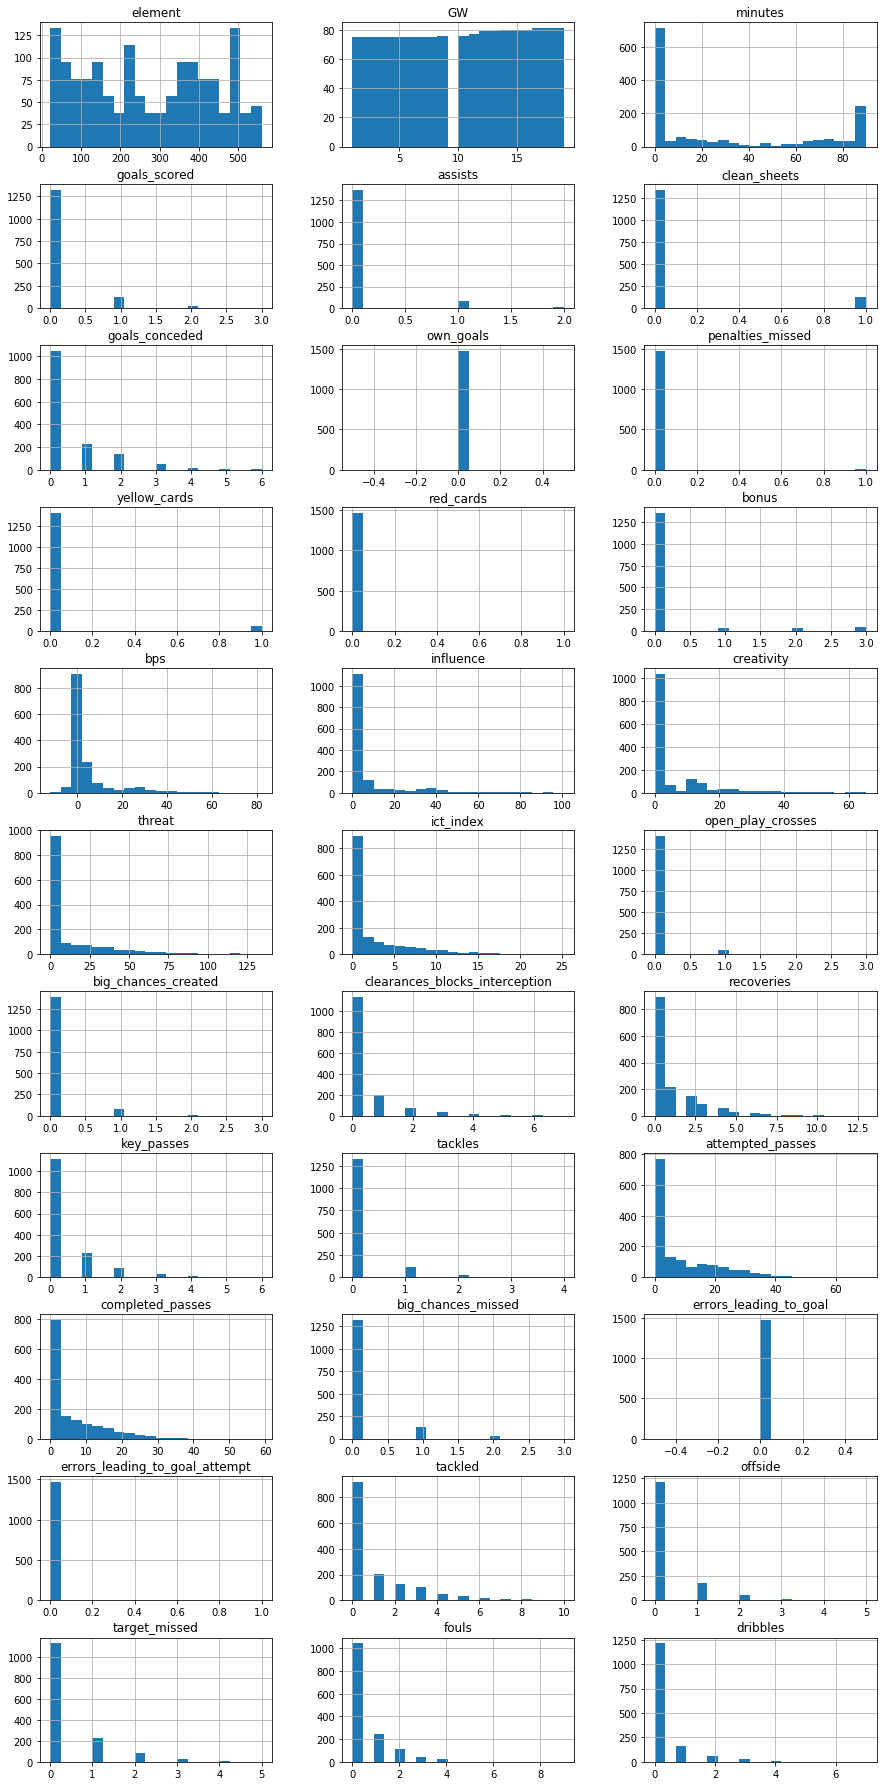

In [7]:
#Good idea to check the properties of each feature to catch anomolies in data.
#FPL data is commerically used in a world-wide game so it is unlikely there will be mistakes
#But still this is good practice and reduces trust in the FPL programmers

#Constraints are usually obvious (e.g 'red_cards' must be integer >= 0 ) but it's good to histogram each
#feature for quick analysis + good 'feel' for each feature which could come in handy later for Machine Learning.

fig, axes = plt.subplots(len(column_names)//3, 3, figsize=(15, 32))  #Creates the canvases for the subplots

i = 0  
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.columns[i], bins = 20, ax=axis)   #Histograms the series of the given column
        i = i+1

#Some of these plots we can ignore (e.g element, GW) but the distributions are useful to analyse. 
#Notice how they are all above 0 and mostly integers. BPS is the exception here as this can actually be below 0
#Full explanation of the Bonus POints System (BPS) can be found here: https://www.premierleague.com/news/106533

In [8]:
#Data looks clean but still is good practice to filter out any anomalous points.
#Simple clean out and constrain any points < 0 that shouldn't be and delete any NaN's.

df = delete_nan_rows(df)  #Gets rid of any rows containing NaN's

col_lessthan = 'bps'
df = isgreaterthan(df,0,col_lessthan)  #Makes sure every feature is >= 0 except for bps

#We could also constrain maximum values and could add this later on
#There's no need for one-hot encoding as all feature-like points are all numeric 

#Finally, save the Dataframe in case API crashes/good to keep a copy so far
#There's not too much data so CSV is an okay format
now = datetime.datetime.now()   #Datetime of now for csv name
df.to_csv('data/'+str(position_str)+'/'+str(now.year)+'-'+str(now.month)+'-'+str(now.day)+'.csv')


In [ ]:
#At this stage all of the FPL data from GW 1 to the current GW has been partly cleaned and savedas a csv
#for a particular position. However it is still key to note that a lot of the players record 0 minutes for games
#and that a game is taken as one data point. 

#In this next stage we will further alter the dataset to include the interesting parts and also define 'form' which
#is key for this analysis.